# Visualisation

## Import the packages 

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display
import json
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700
from pprint import pprint
import re
import requests
from bs4 import BeautifulSoup

import time
import os
from selenium import webdriver
from selenium.webdriver.common. by import By

#vérifier à la fin qu'on a bien utiliser ça
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import the Data Frame

In [3]:
df = pd.read_excel('C:/Users/32484/OneDrive/Bureau/master aight/master 1/Q2/data management/chromedriver_win322/Abritel_merged.xlsx')
df

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122,1592,4.5,51,Particulier,7,3,7,Koksijde-Bad,51.118739,2.634960e+00
1,Chalet confortable logé en forêt près de Durbuy,Chalet,1,114,1477,4.7,59,Particulier,5,2,4,Barvaux,50.350609,5.493284e+00
2,"Bel appartement pour 2 personnes avec WIFI, TV...",Appartement,0,77,1005,5.0,1,Annonce professionnelle,2,1,0,Bredene,51.238941,2.972449e+00
3,Magnifique appartement vue sur mer,Appartement,0,175,2274,0.0,0,Particulier,5,2,4,Albertstrand,51.346426,3.275348e+00
4,Près du Parlement Européen - Appartement rénov...,Appartement,1,100,1298,4.7,94,Particulier,5,2,3,European Quarter,50.842350,4.383945e+00
5,Studio avec garage à Darwin II 0605 à étage 6,Appartement,1,111,1445,0.0,0,rien,5,1,0,Middelkerke,51.183317,2.806352e+00
6,"Grand jardin, moyenne montagne, à la campagne,...",Appartement,0,63,818,4.7,58,Particulier,4,1,3,Sankt-Vith,50.280388,6.125895e+00
7,Chalet Zutendaal,Chalet,0,65,851,0.0,0,rien,4,2,0,Zutendaal,50.931899,5.572555e+00
8,Chalet Zutendaal,Chalet,0,86,1118,0.0,0,rien,6,3,0,Zutendaal,50.931899,5.572555e+00
9,Chalet Zutendaal,Chalet,0,88,1146,5.0,1,rien,6,3,0,Zutendaal,50.931899,5.572555e+00


**Converting the data to type float in order to use them in graphics and maps:**


In [4]:
df['Price per Night'] = df['Price per Night'].astype(float)
df['Total Price'] = df['Total Price'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)

df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)

## Descriptive statistics

### Does the rating impact the price of the location?

**The average prices of rentings based on their rating:**

In [5]:
mean_prices = df.groupby('Rating')['Price per Night'].mean()
mean_prices = df.groupby('Rating')['Price per Night'].mean()

mean_prices_df = pd.DataFrame({'Rating': mean_prices.index, 'Mean Price': mean_prices.values})
mean_prices_df

,Rating,Mean Price
0,0.0,177.013986
1,1.0,85.500000
2,1.3,100.000000
3,2.0,118.000000
4,2.3,186.000000
5,2.7,82.000000
6,3.0,183.000000
7,3.2,140.000000
8,3.3,134.500000
9,3.4,146.000000


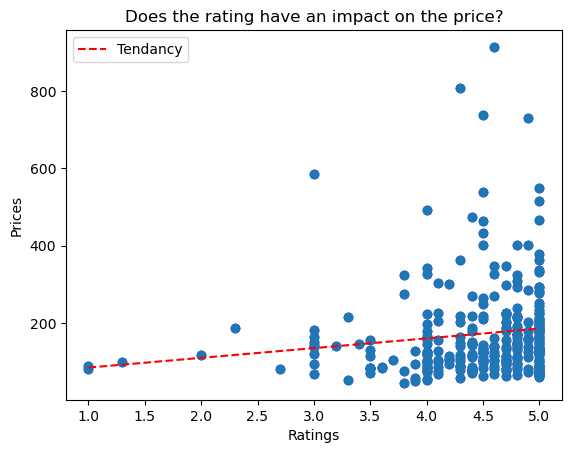

In [6]:
sorted_df = df.copy()
sorted_df = df.sort_values('Rating', ascending=True)
sorted_df = sorted_df[sorted_df['Rating'] != 0]


x = sorted_df["Rating"]
y = sorted_df["Price per Night"]


x_sorted, y_sorted = zip(*sorted(zip(x, y)))
# Create the scatter plot
plt.scatter(x_sorted, y_sorted, color='blue')


# Fit a linear regression model to the data
model = np.polyfit(x_sorted, y_sorted, 1)
predict = np.poly1d(model)

# Create a range of x values to use for plotting the regression line
x_range = np.linspace(min(x_sorted), max(x_sorted), 100)

# Plot the scatter plot and the regression line
plt.scatter(x_sorted, y_sorted)
plt.plot(x_range, predict(x_range), color='r', linestyle='--', label='Tendancy')

plt.title('Does the rating have an impact on the price?')
plt.xlabel('Ratings')
plt.ylabel('Prices')
plt.legend()

**We can observe a positive relationship between the rating and the price.**

In [7]:
df['Rating Category'] = pd.cut(df['Rating'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], 
                               labels=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], 
                               include_lowest=True, right=False)
df

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,Rating Category
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122.0,1592.0,4.5,51.0,Particulier,7.0,3.0,7.0,Koksijde-Bad,51.118739,2.634960e+00,4.5
1,Chalet confortable logé en forêt près de Durbuy,Chalet,1,114.0,1477.0,4.7,59.0,Particulier,5.0,2.0,4.0,Barvaux,50.350609,5.493284e+00,4.5
2,"Bel appartement pour 2 personnes avec WIFI, TV...",Appartement,0,77.0,1005.0,5.0,1.0,Annonce professionnelle,2.0,1.0,0.0,Bredene,51.238941,2.972449e+00,5.0
3,Magnifique appartement vue sur mer,Appartement,0,175.0,2274.0,0.0,0.0,Particulier,5.0,2.0,4.0,Albertstrand,51.346426,3.275348e+00,0.0
4,Près du Parlement Européen - Appartement rénov...,Appartement,1,100.0,1298.0,4.7,94.0,Particulier,5.0,2.0,3.0,European Quarter,50.842350,4.383945e+00,4.5
5,Studio avec garage à Darwin II 0605 à étage 6,Appartement,1,111.0,1445.0,0.0,0.0,rien,5.0,1.0,0.0,Middelkerke,51.183317,2.806352e+00,0.0
6,"Grand jardin, moyenne montagne, à la campagne,...",Appartement,0,63.0,818.0,4.7,58.0,Particulier,4.0,1.0,3.0,Sankt-Vith,50.280388,6.125895e+00,4.5
7,Chalet Zutendaal,Chalet,0,65.0,851.0,0.0,0.0,rien,4.0,2.0,0.0,Zutendaal,50.931899,5.572555e+00,0.0
8,Chalet Zutendaal,Chalet,0,86.0,1118.0,0.0,0.0,rien,6.0,3.0,0.0,Zutendaal,50.931899,5.572555e+00,0.0
9,Chalet Zutendaal,Chalet,0,88.0,1146.0,5.0,1.0,rien,6.0,3.0,0.0,Zutendaal,50.931899,5.572555e+00,5.0


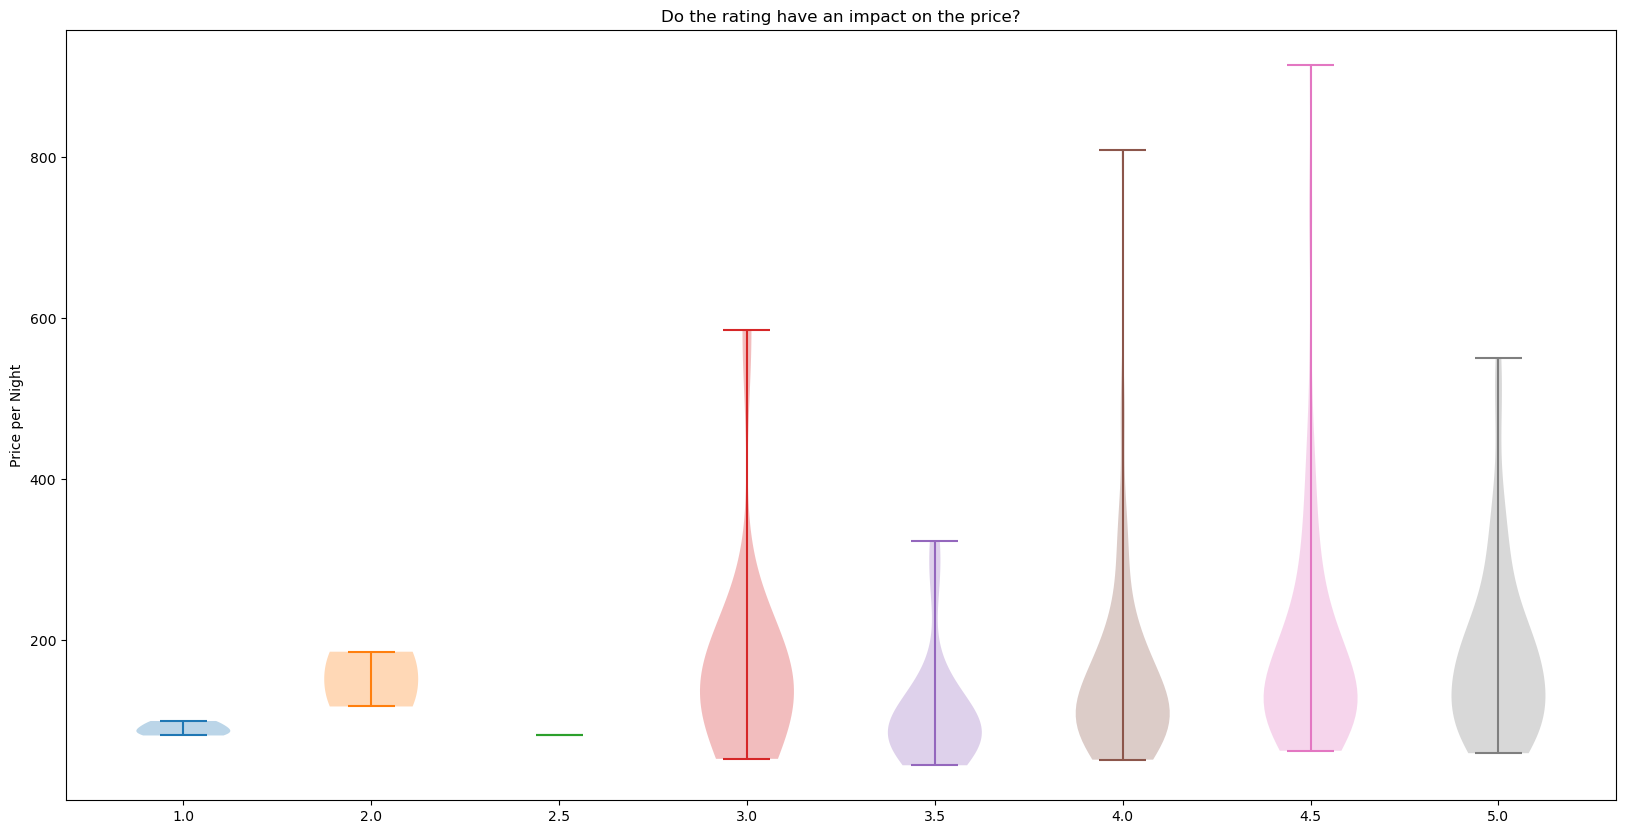

In [8]:
df_clean=df.copy()
df_clean = df_clean[df_clean['Rating Category'] != 0]

fig, ax = plt.subplots(figsize=(20, 10))
# sort the unique values of the Rating column in ascending order
ratings = sorted(df_clean["Rating Category"].unique())

for i, grp in enumerate(ratings):
    vplot = ax.violinplot(
        df_clean[df_clean["Rating Category"]==grp]["Price per Night"], positions=[i], vert=True
    )

ax.set_xticks(np.arange(len(ratings)))
ax.set_xticklabels(ratings)
ax.set_ylabel("Price per Night")
ax.set_title("Do the rating have an impact on the price?")
plt.show()

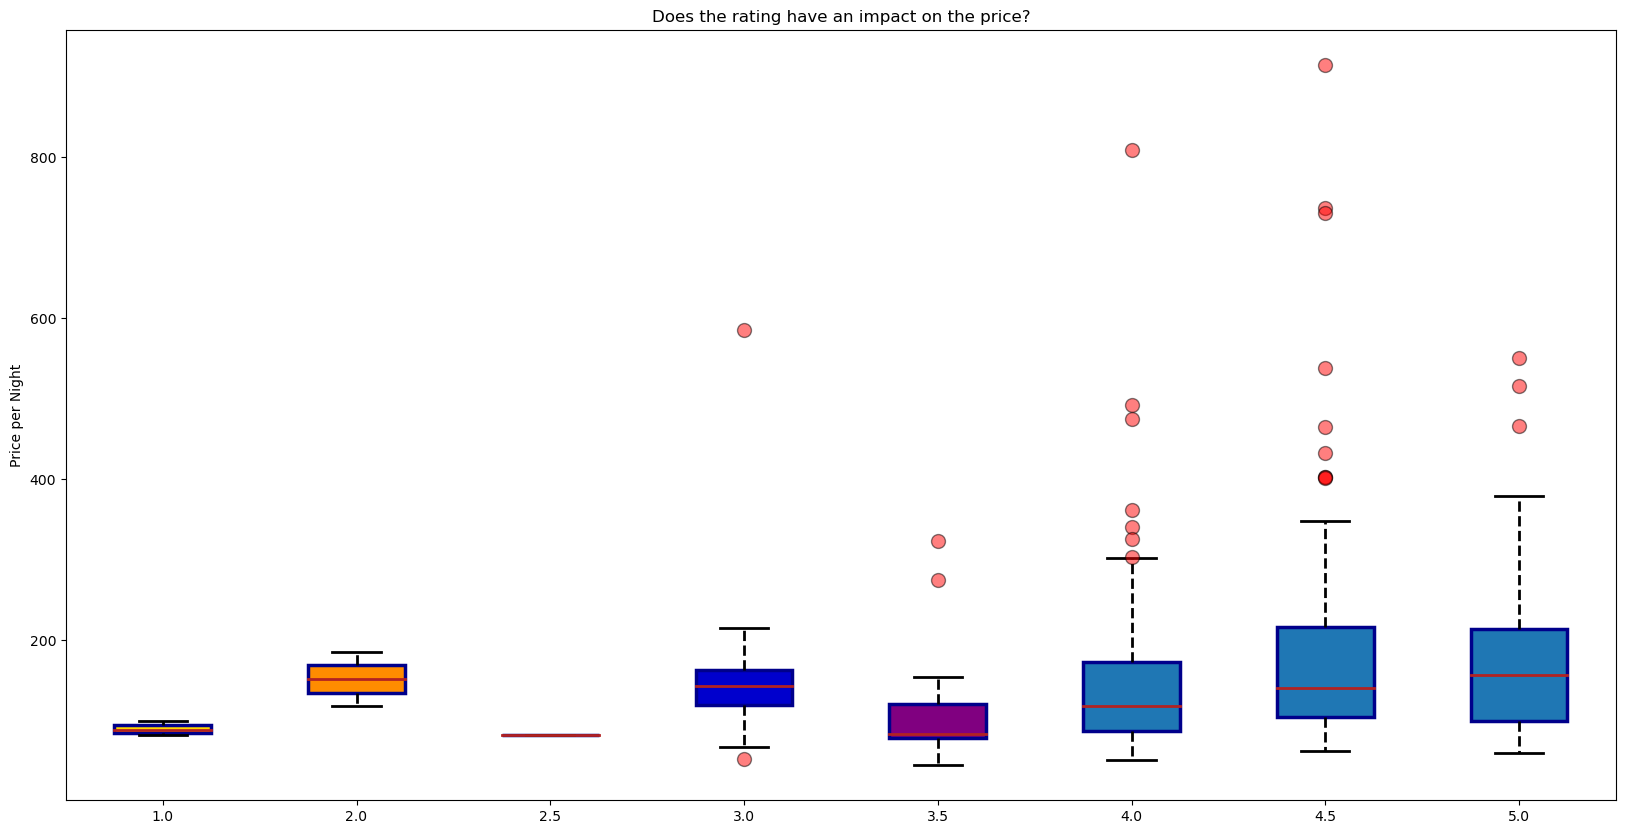

In [9]:
df_clean=df.copy()
df_clean = df_clean[df_clean['Rating Category'] != 0]

fig, ax = plt.subplots(figsize=(20, 10))
# sort the unique values of the Rating column in ascending order
ratings = sorted(df_clean["Rating Category"].unique())

boxprops = dict(linestyle='-', linewidth=2.5, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, alpha=0.5)
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')

bp = ax.boxplot(
    [df_clean[df_clean["Rating Category"]==grp]["Price per Night"] for grp in ratings],
    positions=np.arange(len(ratings)),
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    flierprops=flierprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops
)

colors = ['gold', 'darkorange', 'forestgreen', 'mediumblue', 'purple']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticks(np.arange(len(ratings)))
ax.set_xticklabels(ratings)
ax.set_ylabel("Price per Night")
ax.set_title("Does the rating have an impact on the price?")
plt.show()


**Once again, when dropping extreme values, we can still notice a slight positive relation between the price and the rating.**


**Enter the rating of your lodging (X) and see what is the mean price for that rating:**

In [10]:
# Define the value of X
X = 3.5

# Convert 'Price per Night' column to numeric
df['Price per Night'] = pd.to_numeric(df['Price per Night'])

# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df.groupby('Rating')['Price per Night'].mean()

# Loop over the ratings and print the mean price when the rating is X
for rating, mean_price in mean_prices.items():
    if rating == X:
        print(f"The mean price when the rating is {X} is {mean_price:.2f}")

The mean price when the rating is 3.5 is 99.88


### Does the type of announcement have an impact on the price ?

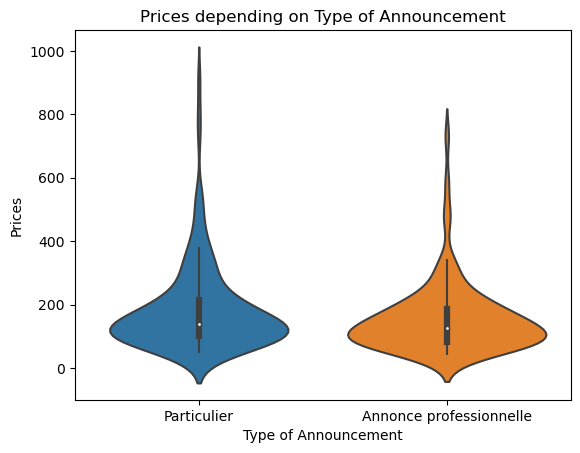

In [11]:
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Price per Night', data=df_clean2)

plt.title('Prices depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Prices')
plt.show()


**We can observe the presence of slightly higher prices when the announcement is published by private individuals, which is also shown by the mean prices of the two categories (see next command).**

**The mean prices depending on the type of announcement:**

In [12]:
# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df_clean2.groupby('Type of annoucement')['Price per Night'].mean()

# Print the mean prices for each rating
mean_prices

Type of annoucement
Annonce professionnelle    155.303922
Particulier                184.654321
Name: Price per Night, dtype: float64

### Does the type of announcement have an impact on the rating ?

*Considering the positive relation we observed on the impact of the ratings on the price, and the tendancy of the price to be higher for the private announcements, we can expect the mean rating of the private annoncement to be higher.*

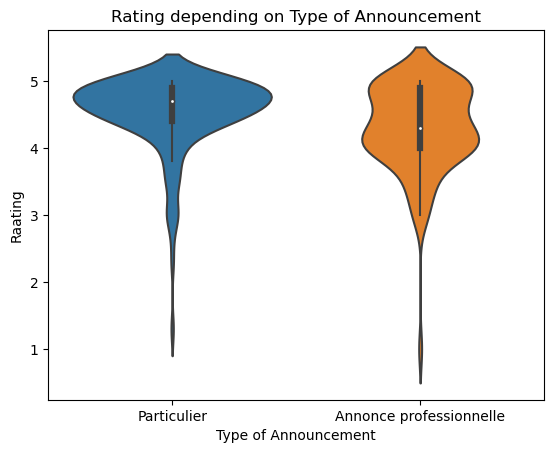

In [13]:
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Rating', data=df_clean2)

plt.title('Rating depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Raating')
plt.show()

**According to the plot, we can conclude that the ratings of private announcements are higher than the professional announcements ones.**

In [14]:
#df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

mean_ratings = df_clean.groupby('Type of annoucement')['Rating'].mean()

# afficher les moyennes des ratings pour chaque rating status
print(mean_ratings)

Type of annoucement
Annonce professionnelle    4.289216
Particulier                4.536420
rien                       4.081250
Name: Rating, dtype: float64


### Does the mention 'Premium' have an impact on the price ?

In [15]:
#sns.violinplot(x=df['hote premium'])

<AxesSubplot: xlabel='hote premium', ylabel='Price per Night'>

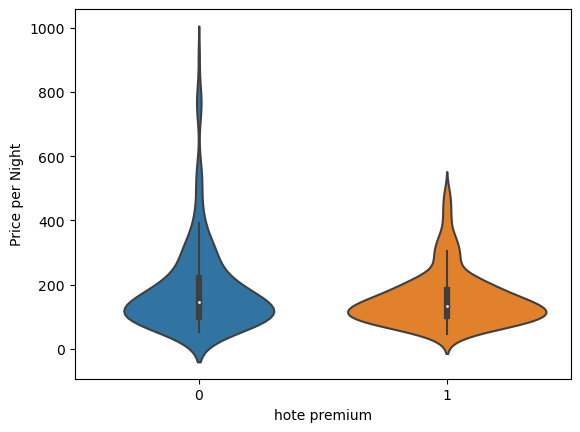

In [16]:
sns.violinplot(x='hote premium', y='Price per Night', data=df)

**We can infer that the premium mention does have an impact on the price, 'Premium' lodgings are less expensive.**

In [17]:

mean_ratings = df.groupby('hote premium')['Price per Night'].mean()

# afficher les moyennes des ratings pour chaque rating status
print(mean_ratings)

hote premium
0    184.955823
1    155.632184
Name: Price per Night, dtype: float64


# Maps

In [18]:
import folium

# Centrer la carte sur Bruxelles
map = folium.Map(location=[50.8466, 4.3517], zoom_start=8)

for Name, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        marker=folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)
        marker.add_child(folium.Popup(row['Name']))

# Afficher la carte
map

Looking at this map, one can see that there are some mistakes make for the localisation of a few element. Indeed geopy is not perfect.

In [19]:
pip install HeatMap

  Using cached heatmap-2.2.1.zip (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\32484\AppData\Local\Temp\pip-install-496c4gur\heatmap_c7ff140f28d240439c309ff3ba6be934\setup.py", line 15
      print "On Windows, skipping build_ext."
            ^
  SyntaxError: Missing parentheses in call to 'print'. Did you mean print("On Windows, skipping build_ext.")?
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [20]:
from folium import plugins

m = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Price per Night']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on price</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Price heatmap').add_to(m)
m

In [21]:
from folium import plugins

m2 = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data_2 = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Rating']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on rating</b></h3>'
m2.get_root().html.add_child(folium.Element(title_html))
# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Rating heatmap').add_to(m2)
m2

**Once again, we can notice the similarities and the relation between the price and the rating.**

## Correlation

In [22]:
df_numerical = df.select_dtypes(include='float')
features= df_numerical.drop(columns=['Total Price'])#input
features.head()

,Price per Night,Rating,Appreciations,Number of Guests,Number of Bedrooms,Number of Beds,latitude,longitude
0,122.0,4.5,51.0,7.0,3.0,7.0,51.118739,2.634960
1,114.0,4.7,59.0,5.0,2.0,4.0,50.350609,5.493284
2,77.0,5.0,1.0,2.0,1.0,0.0,51.238941,2.972449
3,175.0,0.0,0.0,5.0,2.0,4.0,51.346426,3.275348
4,100.0,4.7,94.0,5.0,2.0,3.0,50.842350,4.383945


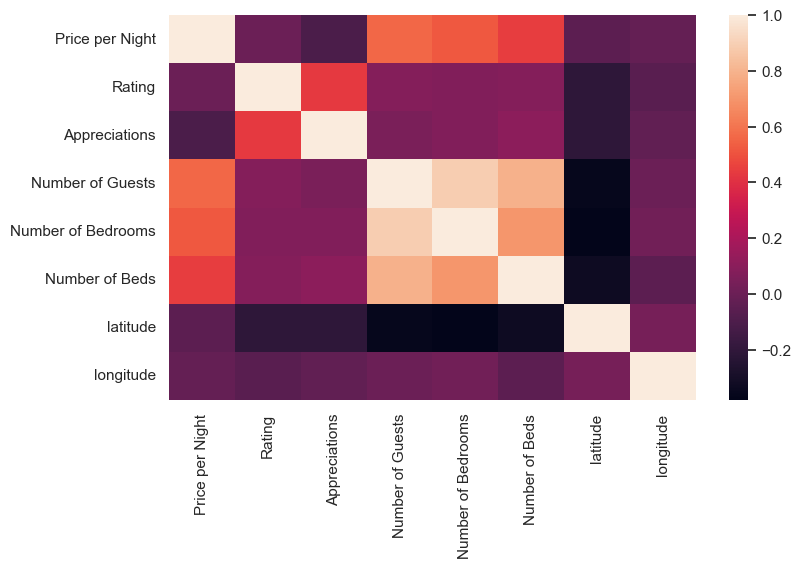

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#input
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = features.corr().round(2)#pq round (2)?
sns.heatmap(correlation_matrix) #annot=True
#heatmat c'est une fonction de seaborn
plt.show()

**One can notice the higher correlations between the price and the number of guests, the number of bedrooms and the number of beds, i.e. the impact of those variables on the price.**